In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import pickle
import json
import joblib

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('C:/Users/DSSAL/Downloads/XGB_mobilehealth/revision_data/traindata_2020_afterCovid.csv')
df_test = pd.read_csv('C:/Users/DSSAL/Downloads/XGB_mobilehealth/revision_data/testdata_2021_afterCovid.csv')

In [3]:
# train set
reviews_train = list(df_train["clean_review"])
sentiments_train = list(df_train["sentiment"])

# test set
reviews_test = list(df_test["clean_review"])
sentiments_test = list(df_test["sentiment"])

In [4]:
vectorizer = CountVectorizer(analyzer="word", max_features=5000)

X_train = vectorizer.fit_transform(reviews_train)
y_train = np.array(sentiments_train)

X_test = vectorizer.transform(reviews_test)
y_test = np.array(sentiments_test)

In [5]:
from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingClassifier(random_state=82, n_estimators=100, learning_rate=0.1, max_depth=4)
# gbm.fit(X_train, y_train)

params = {'n_estimators' : [200, 600, 1000], 'learning_rate' : [0.05, 0.1, 0.2], 'max_depth' : [4, 6, 8]}
gbm = GridSearchCV(gbm, param_grid=params, cv=5, verbose=3,n_jobs=-1)
gbm.fit(X_train, y_train)

gbm_predict = gbm.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [6]:
joblib.dump(gbm, 'C:/Users/DSSAL/Downloads/GBM_mobilehealth/gbm_bow_with_gridsearch_afterCovid.pkl')

['C:/Users/DSSAL/Downloads/GBM_mobilehealth/gbm_bow_with_gridsearch_afterCovid.pkl']

In [7]:
print("Accuracy: %f" % accuracy_score(y_test, gbm_predict))

Accuracy: 0.889583


Text(0.5, 257.44, 'Predicted label')

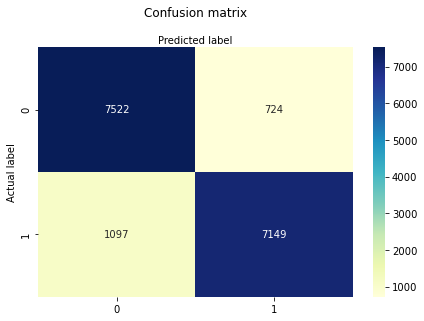

In [8]:
cnf_matrix = metrics.confusion_matrix(y_test, gbm_predict)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, gbm_predict))
print("Precision:",metrics.precision_score(y_test, gbm_predict))
print("Recall:",metrics.recall_score(y_test, gbm_predict))

Accuracy: 0.8895828280378365
Precision: 0.9080401371776959
Recall: 0.8669658016007762


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gbm_predict, target_names=['class low', 'class high']))

              precision    recall  f1-score   support

   class low       0.87      0.91      0.89      8246
  class high       0.91      0.87      0.89      8246

    accuracy                           0.89     16492
   macro avg       0.89      0.89      0.89     16492
weighted avg       0.89      0.89      0.89     16492



In [11]:
report = classification_report(y_test, gbm_predict, target_names=['class low', 'class high'], output_dict=True)
df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
class low,0.872723,0.912200,0.892025,8246.000000
class high,0.908040,0.866966,0.887028,8246.000000
accuracy,0.889583,0.889583,0.889583,0.889583
macro avg,0.890382,0.889583,0.889526,16492.000000
weighted avg,0.890382,0.889583,0.889526,16492.000000


In [12]:
gbm.best_params_

{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 1000}